# Exercise of the 12th of october 2020

related to the pdf file, tutorial

## Imports

In [47]:
import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 16, 10

## Loading Data

In [48]:
data = np.loadtxt('linear.data')

In [49]:
# Separate X and y (Features from label)
X = data [:, 0: -1]
Y = data [:, -1]

In [50]:
print(Y[:10])

[ 1.  1.  1.  1.  1.  1. -1. -1.  1. -1.]


In [51]:
N, d = X.shape

In [52]:
positive_class = X[Y == 1., :]
negative_class = X[Y == -1., :]

In [53]:
print(X[:5])

[[0.671458 0.679075]
 [0.196186 0.977786]
 [0.702633 0.809996]
 [0.909886 0.548065]
 [0.416232 0.73958 ]]


it seems to be a coordinate system with two dimension

## Visualization

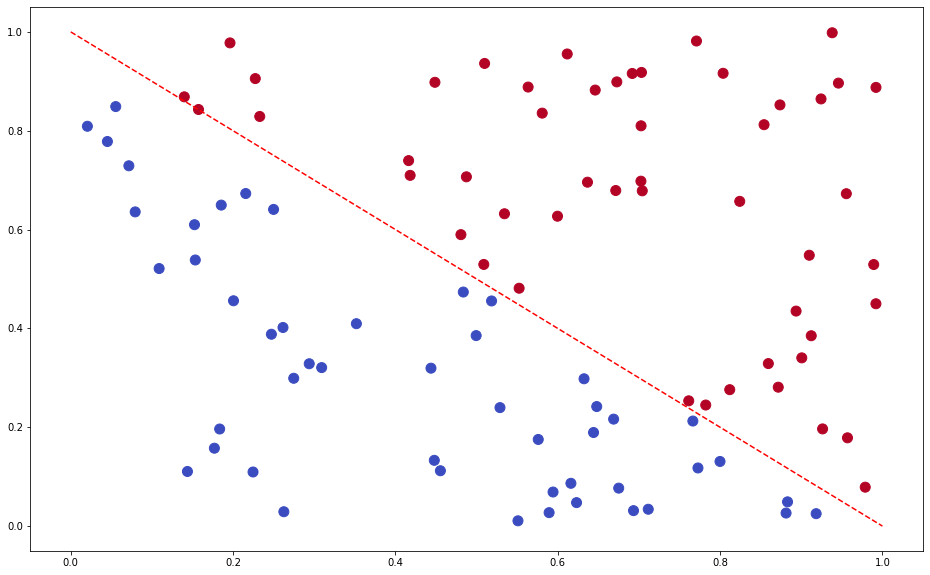

In [54]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=100, c=Y, cmap=plt.cm.coolwarm)
ax.plot((1,0), 'r--')
plt.show()

## Perceptron algorithm

In [55]:
learning_rate = 0.1
Weights = np.zeros((1,d))

In [56]:
def stochastic_perceptron(X, Y, W, b, lr, epochs=1):
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            row = np.reshape(np.array([X[i,:]]), (2,-1))
            f_w_x = np.sign(np.dot(W, row)+b)
            temp = np.multiply(learning_rate, (Y[i]-f_w_x))
            # update W
            dW = np.dot(temp,np.array([X[i,:]]))
            W = W + dW
            # update Bias
            b += temp[0,0]
    return W, b

In [57]:
W, b = stochastic_perceptron(X, Y, np.copy(Weights), 0., learning_rate)
W

array([[0.49595114, 0.4639833 ]])

## Ploting the regression line

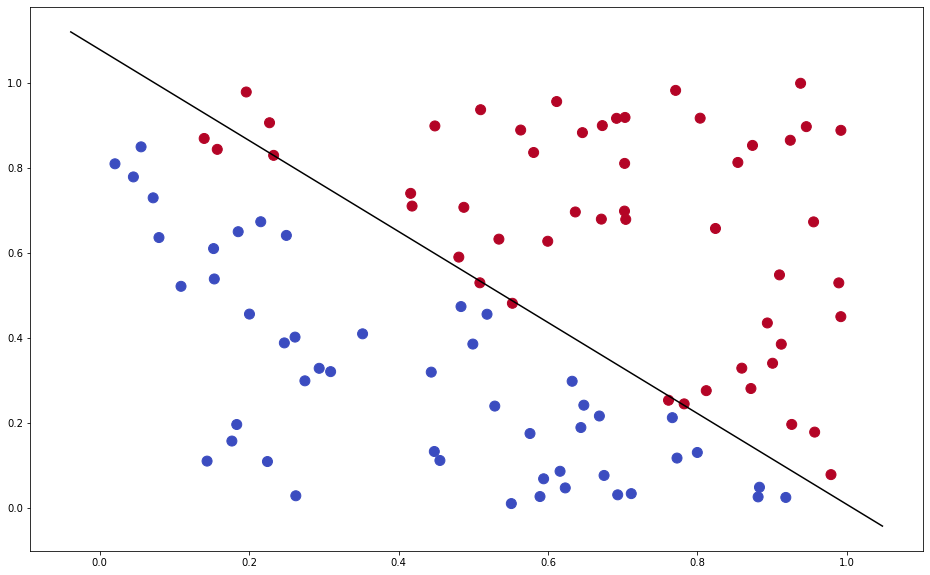

In [58]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=100, c=Y, cmap=plt.cm.coolwarm)

# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
a = -W[0,0] / W[0,1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (b) / W[0,1]

# Plot the hyperplane
ax.plot(xx, yy, 'k-')
plt.show()

## Computing LMS

In [59]:
def Least_mean_squares(X, Y, W, b):
    lms = 0
    for i in range(X.shape[0]):
        row = np.reshape(np.array([X[i,:]]), (2,-1))
        f_w_x = np.sign(np.dot(W, row)+b)
        lms += np.power((Y[i]-f_w_x),2)[0,0]
    print("LMS : {}".format(lms/2))

In [60]:
Least_mean_squares(X, Y, W, b)

LMS : 10.0


In [61]:
def Functional_margin(X, Y, W, b, log=False):
    fm = 0
    for i in range(X.shape[0]):
        row = np.reshape(np.array([X[i,:]]), (2,-1))
        f_w_x = np.sign(np.dot(W, row)+b)
        fm += np.sign(Y[i]*f_w_x[0,0])
    if log:
        print("Fm : {}, over : {}".format(int(fm), X.shape[0]))
    return int(fm)

In [62]:
Functional_margin(X, Y, W, b, True)

Fm : 90, over : 100


90

In [63]:
def Geometrical_margin(X, Y, W, b, log=False):
    gm = 0
    for i in range(X.shape[0]):
        row = np.reshape(np.array([X[i,:]]), (2,-1))
        f_w_x = np.sign(np.dot(W, row)+b)
        gm += f_w_x[0,0]/np.linalg.norm(W)
    if log:
        print("gm : {}".format(int(gm)))
    return int(gm)

In [64]:
def stochastic_perceptron_fm(X, Y, W, b, lr, fm):
    fm_res = False
    epochs = 0
    while not fm_res:
        for i in range(X.shape[0]):
            row = np.reshape(np.array([X[i,:]]), (2,-1))
            f_w_x = np.sign(np.dot(W, row)+b)
            temp = np.multiply(learning_rate, (Y[i]-f_w_x))
            # update W
            dW = np.dot(temp,np.array([X[i,:]]))
            W = W + dW
            # update Bias
            b += temp[0,0]
        epochs+=1
        fm_res = X.shape[0] == fm(X, Y, W, b)
    return W, b, epochs

In [65]:
def stochastic_perceptron_gm(X, Y, W, b, lr, gm):
    percentage = 0.1
    gm_res = False
    gm_temp = gm(X, Y, W, b)
    epochs = 0
    while not gm_res:
        for i in range(X.shape[0]):
            row = np.reshape(np.array([X[i,:]]), (2,-1))
            f_w_x = np.sign(np.dot(W, row)+b)
            temp = np.multiply(learning_rate, (Y[i]-f_w_x))
            # update W
            dW = np.dot(temp,np.array([X[i,:]]))
            W = W + dW
            # update Bias
            b += temp[0,0]
        epochs+=1
        
        gm_temp2 = gm(X, Y, W, b)
        gm_res = gm_temp == gm_temp2
        gm_temp = gm_temp2
    return W, b, epochs

In [66]:
W, b, e = stochastic_perceptron_fm(X, Y, np.copy(Weights), 0., learning_rate, Functional_margin)

In [67]:
print("W => {}\nb => {}\nEpochs => {}".format(W, b, e))

W => [[0.48526328 0.53277328]]
b => -0.5
Epochs => 2


In [68]:
W, b, e = stochastic_perceptron_fm(X, Y, np.copy(Weights), 0., 0.0001, Functional_margin)

In [69]:
print("W => {}\nb => {}\nEpochs => {}".format(W, b, e))

W => [[0.48526328 0.53277328]]
b => -0.5
Epochs => 2


In [70]:
Weights = np.matrix([[0.5,0.2]])
W, b, e = stochastic_perceptron_gm(X, Y, np.copy(Weights), 0., 0.0001, Geometrical_margin)

In [71]:
print("W => {}\nb => {}\nEpochs => {}".format(W, b, e))

W => [[1.13759992 1.32802288]]
b => -1.2
Epochs => 12


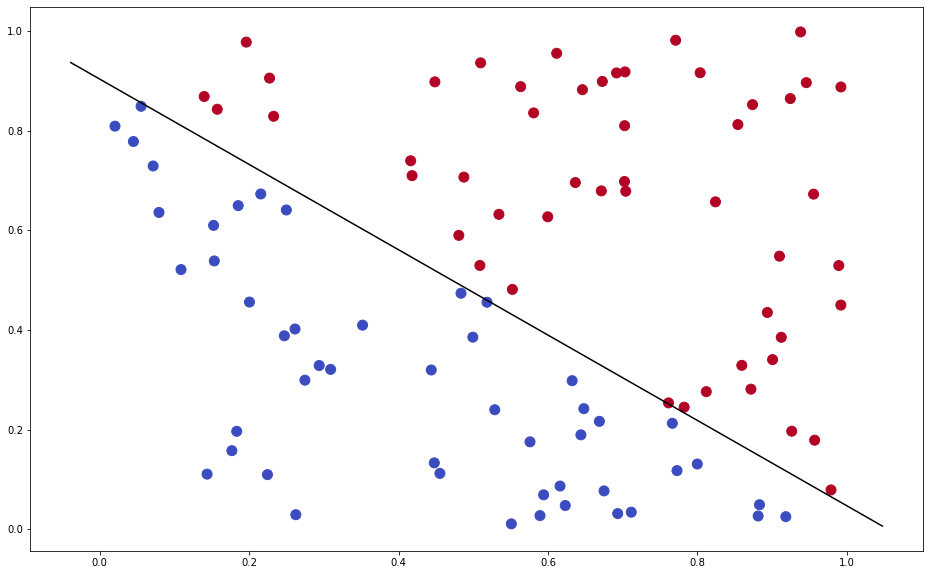

In [72]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=100, c=Y, cmap=plt.cm.coolwarm)

# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
a = -W[0,0] / W[0,1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (b) / W[0,1]

# Plot the hyperplane
ax.plot(xx, yy, 'k-')
plt.show()